# Bibliotecas

In [356]:
%%capture

import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import numpy as np
import xlrd
import seaborn as sns

# Dados reservatório calibração – Ponto R4

In [357]:
# %%capture

def dados_reservatorio_discretos(plotar=False):
    dados = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispersao-e-qualidade-da-agua/pasta_final/dados-para-interpolacao_final.xlsx?raw=true')
    
    colunas = ['OD (mg/L)', 'temperatura (ºC)', 'fosforo_total (ug/L)',
               'fosforo_reativo (ug/L)', 'nitrog_amoniacal (ug/L)', 'nitrog_total (ug/L)',
               'nitrito (ug/L)', 'nitrato (ug/L)']
    
    data_frame = pd.DataFrame(dados['data'])
    
    cont = 0
    for c in colunas:
        if cont == 0 or cont == 1:
            data_frame = data_frame.join(pd.DataFrame(dados[c]))
        else:
            data_frame = data_frame.join(pd.DataFrame(dados[c] * 10 ** (- 3)))
        cont += 1
    
    if plotar == True:
        nomes_ajustados = ['Oxigênio Dissolvido ($\mathrm{mgL}^{-1}$)', 'Temperatura (ºC)', 'Fósforo Total ($\mathrm{mgL}^{-1}$)',
                           'Fósforo Reativo ($\mathrm{mgL}^{-1}$)', 'Nitrogênio Amoniacal ($\mathrm{mgL}^{-1}$)', 'Nitrogênio Total ($\mathrm{mgL}^{-1}$)',
                           'Nitrito ($\mathrm{mgL}^{-1}$)', 'Nitrato ($\mathrm{mgL}^{-1}$)']

        for i in range(len(nomes_ajustados)):
            plt.figure(figsize=(7, 5), dpi=50)
            
            if i == 1:
                plt.ylabel('Temperatura (ºC)')
            else:
                plt.ylabel('Concentração ($\mathrm{mgL}^{-1}$)')
            
            plt.xlabel('Tempo (dias)')
            plt.plot(data_frame['data'], data_frame[colunas[i]], 'o', color='black', label=nomes_ajustados[i])
            plt.xticks(rotation=45)
            plt.grid(linestyle='--')
            plt.legend(loc='best')
#             plt.savefig(f'/Users/matheus/Desktop/figuras/figura_{i}')
            plt.show()
            plt.close()
    
    return data_frame.dropna()


dados_reservatorio_discretos()

,data,OD (mg/L),temperatura (ºC),fosforo_total (ug/L),fosforo_reativo (ug/L),nitrog_amoniacal (ug/L),nitrog_total (ug/L),nitrito (ug/L),nitrato (ug/L)
15,2010-03-16,3.774000,21.235000,0.021353,0.003746,0.182048,0.187302,0.002148,0.049090
43,2010-04-13,5.399500,20.095000,0.017802,0.005105,0.242654,0.176480,0.003917,0.028542
78,2010-05-18,5.373000,18.000000,0.017120,0.010241,0.339960,0.246566,0.009353,0.234442
114,2010-06-23,7.528571,16.014286,0.006714,0.005082,0.392459,0.246694,0.005441,0.302503
148,2010-07-27,8.397143,16.538095,0.012717,0.004867,0.323124,0.316024,0.006201,0.338740
169,2010-08-17,8.491429,14.738095,0.019812,0.005787,0.324470,0.300946,0.006130,0.335530
204,2010-09-21,7.887143,17.095238,0.045122,0.003644,0.331795,0.351737,0.003646,0.340211
239,2010-10-26,10.036500,18.845000,0.014136,0.001731,0.063604,0.440527,0.000007,0.406988
266,2010-11-22,2.969524,20.628571,0.020908,0.011722,0.227887,0.240073,0.004482,0.153523
296,2010-12-22,2.724762,20.842857,0.017715,0.007091,0.261427,0.231931,0.170120,0.004595


In [358]:
%%capture

def dados_reservatorio_interpolado(plotar=False):
    dados = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispersao-e-qualidade-da-agua/pasta_final/dados-para-interpolacao_final.xlsx?raw=true')
    
    colunas = ['OD (mg/L)', 'temperatura (ºC)', 'fosforo_total (ug/L)',
               'fosforo_reativo (ug/L)', 'nitrog_amoniacal (ug/L)', 'nitrog_total (ug/L)',
               'nitrito (ug/L)', 'nitrato (ug/L)']
    
    data_frame = pd.DataFrame(dados['data'])
    
    cont = 0
    for c in colunas:
        if cont == 0 or cont == 1:
            interpolacao = pd.DataFrame(dados[c]).interpolate()
            data_frame = data_frame.join(interpolacao)
        else:
            interpolacao = pd.DataFrame(dados[c] * 10 ** (- 3)).interpolate()
            data_frame = data_frame.join(interpolacao)
            
        cont += 1
    
    if plotar == True:
        nomes_ajustados = ['Oxigênio Dissolvido ($\mathrm{mgL}^{-1}$)', 'Temperatura (ºC)', 'Fósforo Total ($\mathrm{mgL}^{-1}$)',
                           'Fósforo Reativo ($\mathrm{mgL}^{-1}$)', 'Nitrogênio Amoniacal ($\mathrm{mgL}^{-1}$)', 'Nitrogênio Total ($\mathrm{mgL}^{-1}$)',
                           'Nitrito ($\mathrm{mgL}^{-1}$)', 'Nitrato ($\mathrm{mgL}^{-1}$)']

        for i in range(len(nomes_ajustados)):
            plt.figure(figsize=(7, 5), dpi=150)
            
            if i == 1:
                plt.ylabel('Temperatura (ºC)')
            else:
                plt.ylabel('Concentração ($\mathrm{mgL}^{-1}$)')
            
            plt.xlabel('Tempo (dias)')
            plt.plot(data_frame['data'], data_frame[colunas[i]], '-', color='black', label=nomes_ajustados[i])
            plt.xticks(rotation=45)
            plt.grid(linestyle='--')
            plt.legend(loc='best')
#             plt.savefig(f'/Users/matheus/Desktop/figuras/figura_{i}')
            plt.show()
            plt.close()
    
    return data_frame.dropna()


dados_reservatorio_interpolado()

# Dados tributários

In [359]:
# %%capture

def dados_tributarios():
    df_trib_F4 = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispersao-e-qualidade-da-agua/pasta_final/dados-para-interpolacao_final.xlsx?raw=true', 'trib_F4').reset_index()
    df_trib_TE_10 = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispersao-e-qualidade-da-agua/pasta_final/dados-para-interpolacao_final.xlsx?raw=true', 'trib_TE_10').reset_index()
    df_trib_TD_4 = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispersao-e-qualidade-da-agua/pasta_final/dados-para-interpolacao_final.xlsx?raw=true', 'trib_TD_4').reset_index()
    df_trib_F5 = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispersao-e-qualidade-da-agua/pasta_final/dados-para-interpolacao_final.xlsx?raw=true', 'trib_F5').reset_index()

    colunas = ['Oxigênio dissolvido', 'temperatura',
               'Fósforo total', 'Fósforo reativo', 'Nitrogênio amonical',
               'Nitrogênio total', 'Nitrito', 'Nitrato']
    
    lista = [df_trib_F4, df_trib_TE_10, df_trib_TD_4, df_trib_F5]
    
    nomes = ['df_trib_F4', 'df_trib_TE_10', 'df_trib_TD_4', 'df_trib_F5']
    
    dicionario = {}
    
    cont = 0
    for i in range(len(lista)):
        data_frame = pd.DataFrame(lista[i]['data'])
        
        for c in colunas:
            if cont == 0 or cont == 1:
                interpolacao = pd.DataFrame(lista[i][c]).interpolate()
            else:
                interpolacao = pd.DataFrame(lista[i][c] * 10 ** (- 3)).interpolate()
            
            data_frame = data_frame.join(pd.DataFrame(interpolacao))
            cont += 1
        
        cont = 0 
        
        dicionario[nomes[i]] = data_frame.dropna()
    
    return dicionario
            

# dados_tributarios()
display(dados_tributarios()['df_trib_F4'])
display(dados_tributarios()['df_trib_TE_10'])
display(dados_tributarios()['df_trib_TD_4'])

,data,Oxigênio dissolvido,temperatura,Fósforo total,Fósforo reativo,Nitrogênio amonical,Nitrogênio total,Nitrito,Nitrato
15,2010-03-16,9.000000,21.600000,0.042000,0.009460,0.141000,0.182000,0.019180,0.278000
16,2010-03-17,9.007143,21.489286,0.041888,0.009366,0.139079,0.182179,0.018714,0.273107
17,2010-03-18,9.014286,21.378571,0.041775,0.009272,0.137157,0.182357,0.018248,0.268214
18,2010-03-19,9.021429,21.267857,0.041663,0.009178,0.135236,0.182536,0.017782,0.263321
19,2010-03-20,9.028571,21.157143,0.041550,0.009084,0.133314,0.182714,0.017316,0.258429
...,...,...,...,...,...,...,...,...,...
301,2010-12-27,6.510000,21.900000,0.034700,0.012200,0.496600,0.281000,0.304700,0.012900
302,2010-12-28,6.510000,21.900000,0.034700,0.012200,0.496600,0.281000,0.304700,0.012900
303,2010-12-29,6.510000,21.900000,0.034700,0.012200,0.496600,0.281000,0.304700,0.012900
304,2010-12-30,6.510000,21.900000,0.034700,0.012200,0.496600,0.281000,0.304700,0.012900


,data,Oxigênio dissolvido,temperatura,Fósforo total,Fósforo reativo,Nitrogênio amonical,Nitrogênio total,Nitrito,Nitrato
15,2010-03-16,8.300000,21.200000,0.027600,0.004120,0.373000,0.182000,0.009750,0.293000
16,2010-03-17,8.303571,21.117857,0.028504,0.004348,0.364643,0.182286,0.010216,0.287714
17,2010-03-18,8.307143,21.035714,0.029407,0.004575,0.356286,0.182571,0.010682,0.282429
18,2010-03-19,8.310714,20.953571,0.030311,0.004803,0.347929,0.182857,0.011148,0.277143
19,2010-03-20,8.314286,20.871429,0.031214,0.005030,0.339571,0.183143,0.011614,0.271857
...,...,...,...,...,...,...,...,...,...
301,2010-12-27,6.810000,22.300000,0.030000,0.015300,0.478700,0.355100,0.448600,0.008900
302,2010-12-28,6.810000,22.300000,0.030000,0.015300,0.478700,0.355100,0.448600,0.008900
303,2010-12-29,6.810000,22.300000,0.030000,0.015300,0.478700,0.355100,0.448600,0.008900
304,2010-12-30,6.810000,22.300000,0.030000,0.015300,0.478700,0.355100,0.448600,0.008900


,data,Oxigênio dissolvido,temperatura,Fósforo total,Fósforo reativo,Nitrogênio amonical,Nitrogênio total,Nitrito,Nitrato
15,2010-03-16,8.300000,20.900000,0.027100,0.006660,0.359000,0.192000,0.004970,0.306000
16,2010-03-17,8.307143,20.832143,0.027135,0.006782,0.348957,0.191857,0.005138,0.300321
17,2010-03-18,8.314286,20.764286,0.027171,0.006904,0.338914,0.191714,0.005306,0.294643
18,2010-03-19,8.321429,20.696429,0.027206,0.007026,0.328871,0.191571,0.005475,0.288964
19,2010-03-20,8.328571,20.628571,0.027241,0.007149,0.318829,0.191429,0.005643,0.283286
...,...,...,...,...,...,...,...,...,...
301,2010-12-27,6.320000,21.300000,0.015500,0.022200,0.492200,0.349600,0.441700,0.013800
302,2010-12-28,6.320000,21.300000,0.015500,0.022200,0.492200,0.349600,0.441700,0.013800
303,2010-12-29,6.320000,21.300000,0.015500,0.022200,0.492200,0.349600,0.441700,0.013800
304,2010-12-30,6.320000,21.300000,0.015500,0.022200,0.492200,0.349600,0.441700,0.013800


# Dados estação barragem

In [360]:
%%capture

def dados_barragem():
    dados = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispersao-e-qualidade-da-agua/arquivos/estacao-barragem.xls?raw=true')
    
    colunas = ['Vel. Vento média (m/s)', 'Temp. média (ºC)',
               'Umid. rel. média (%)', 'Prec. (mm)']
    
    dados = dados.replace(to_replace=- 6999.0, value=np.nan)
    
    dados_media_diaria = dados[['Data', 'Vel. Vento média (m/s)', 'Temp. média (ºC)', 'Umid. rel. média (%)']]
    dados_media_diaria = dados_media_diaria.groupby(by=['Data'], as_index=False).mean()
    
    prec_acumulada_diaria = dados[['Data', 'Prec. (mm)']]
    prec_media_diaria = prec_acumulada_diaria.groupby(by=['Data'], as_index=False).mean()
    
    data_frame = dados_media_diaria.join(pd.DataFrame(prec_media_diaria['Prec. (mm)']))
    
    data_frame_final = pd.DataFrame(data_frame['Data'])
    
    for c in colunas:
        interpolacao = pd.DataFrame(data_frame[c]).interpolate()
        data_frame_final = data_frame_final.join(interpolacao)
    
    return data_frame_final


dados_barragem()

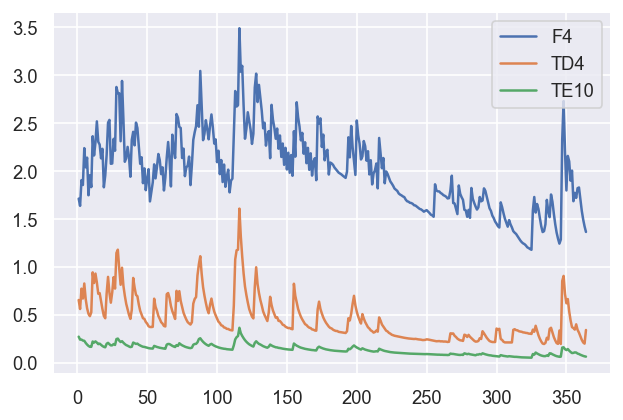

In [361]:
def dados_vazao():
    dados = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/Modelos-de-dispersao-e-qualidade-da-agua/arquivos/vazaoSWAT_entradaSisBaHiA.xls?raw=true')
    
    dados_filtrados = pd.DataFrame(dados[["ponto", "Dia", "F4", "TD4", "TE10"]].copy()) # m³/s - conferir unidades

    return dados_filtrados

plt.figure(1, dpi=120)
plt.plot(dados_vazao()['Dia'], dados_vazao()['F4'], label='F4')
plt.plot(dados_vazao()['Dia'], dados_vazao()['TD4'], label='TD4')
plt.plot(dados_vazao()['Dia'], dados_vazao()['TE10'], label='TE10')
plt.legend()
plt.show()

In [362]:
%%capture

# Evaporação pela equação de Thornthwaite

def dados_evapo():
    dados_temperatura_dia = dados_barragem()['Temp. média (ºC)']

    # temp_media_dia.iloc[0:31]

    temp_media_mes1 = dados_temperatura_dia.iloc[0:31].mean()
    temp_media_mes2 = dados_temperatura_dia.iloc[32:60].mean()
    temp_media_mes3 = dados_temperatura_dia.iloc[61:92].mean()
    temp_media_mes4 = dados_temperatura_dia.iloc[93:123].mean()
    temp_media_mes5 = dados_temperatura_dia.iloc[124:155].mean()
    temp_media_mes6 = dados_temperatura_dia.iloc[156:186].mean()
    temp_media_mes7 = dados_temperatura_dia.iloc[187:218].mean()
    temp_media_mes8 = dados_temperatura_dia.iloc[219:249].mean()
    temp_media_mes9 = dados_temperatura_dia.iloc[250:281].mean()
    temp_media_mes10 = dados_temperatura_dia.iloc[282:313].mean()
    temp_media_mes11 = dados_temperatura_dia.iloc[314:344].mean()
    temp_media_mes12 = dados_temperatura_dia.iloc[345:376].mean()

    temp_media_mes_dict = {'Mês' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Temp. média (ºC)' : [temp_media_mes1, temp_media_mes2, temp_media_mes3, temp_media_mes4, temp_media_mes5, temp_media_mes6, temp_media_mes7, temp_media_mes8, temp_media_mes9, temp_media_mes10, temp_media_mes11, temp_media_mes12]}

    temp_media_mes = pd.DataFrame(temp_media_mes_dict)

    # Determinando valor de I

    I = (temp_media_mes['Temp. média (ºC)'].iloc[0]/5)**1.514 + (temp_media_mes['Temp. média (ºC)'].iloc[1]/5)**1.514 + (temp_media_mes['Temp. média (ºC)'].iloc[2]/5)**1.514 +(temp_media_mes['Temp. média (ºC)'].iloc[3]/5)**1.514 + (temp_media_mes['Temp. média (ºC)'].iloc[4]/5)**1.514 +(temp_media_mes['Temp. média (ºC)'].iloc[5]/5)**1.514 +(temp_media_mes['Temp. média (ºC)'].iloc[6]/5)**1.514 +(temp_media_mes['Temp. média (ºC)'].iloc[7]/5)**1.514 + (temp_media_mes['Temp. média (ºC)'].iloc[8]/5)**1.514 + (temp_media_mes['Temp. média (ºC)'].iloc[9]/5)**1.514 + (temp_media_mes['Temp. média (ºC)'].iloc[10]/5)**1.514 + (temp_media_mes['Temp. média (ºC)'].iloc[11]/5)**1.514 

    # Determinando valor de a

    a = 6.75 * (10**-7) * (I ** 3) - 7.71 * (10**-5) * (I**2) + 1.792 * (10**-2) * I + 0.49239

    # Determinando valor de E para cada mês (mm/mes)

    E1 = 16 * (10*21.259224/I) ** a
    E2 = 16 * (10*21.699927/I) ** a
    E3 = 16 * (10*20.12336/I) ** a
    E4 = 16 * (10*16.491354/I) ** a
    E5 = 16 * (10*13.600744/I) ** a
    E6 = 16 * (10*13.770589/I) ** a
    E7 = 16 * (10*13.479297/I) ** a
    E8 = 16 * (10*15.204781/I) ** a
    E9 = 16 * (10*15.994973/I) ** a
    E10 = 16 * (10*11.824963/I) ** a
    E11 = 16 * (10*19.340333/I) ** a
    E12 = 16 * (10*19.749505/I) ** a

    # Evapotranspiração em mm/d

    E_mes = np.array([E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12])

    E_dia = E_mes/30

    E_mar = np.repeat(E_dia[2], 31)
    E_abr = np.repeat(E_dia[3], 30)
    E_mai = np.repeat(E_dia[4], 31)
    E_jun = np.repeat(E_dia[5], 30)
    E_jul = np.repeat(E_dia[6], 31)
    E_ago = np.repeat(E_dia[7], 31)
    E_set = np.repeat(E_dia[8], 30)
    E_out = np.repeat(E_dia[9], 31)
    E_nov = np.repeat(E_dia[10], 30)
    E_dez = np.repeat(E_dia[11], 31)

    E_dia_acumulado = np.concatenate([E_mar, E_abr, E_mai, E_jun, E_jul, E_ago, E_set, E_out, E_nov, E_dez ]) # array com valores diários de evapotransp

    E_dia_acumulado_df = pd.DataFrame(E_dia_acumulado)
    E_dia_acumulado_df = E_dia_acumulado_df.rename(columns = {0:'Evaproação (mm/d)'})

    return E_dia_acumulado_df
    

dados_evapo()

# Ajuste de variáveis

In [363]:
vazao_TD4 = dados_vazao()['TD4']
vazao_TD4_dias_interesse = vazao_TD4[73:] * 86400 # m3/dia

vazao_TE10 = dados_vazao()['TE10']
vazao_TE10_dias_interesse = vazao_TE10[73:] * 86400 # m3/dia

vazao_F4 = dados_vazao()['F4']
vazao_F4_dias_interesse = vazao_F4[73:] * 86400 # m3/dia

time = 291
dt = 1
tvals = np.arange(0, time, dt)

evaporacao = dados_evapo().to_numpy()[15:]

evap_list = []
for e in evaporacao:
    evap_list.append(e)

evap = np.concatenate(evap_list)

precipitacao = dados_barragem()['Prec. (mm)']

chuva = precipitacao[74:].to_numpy()

# Plotando precipitação e evapotranspiração

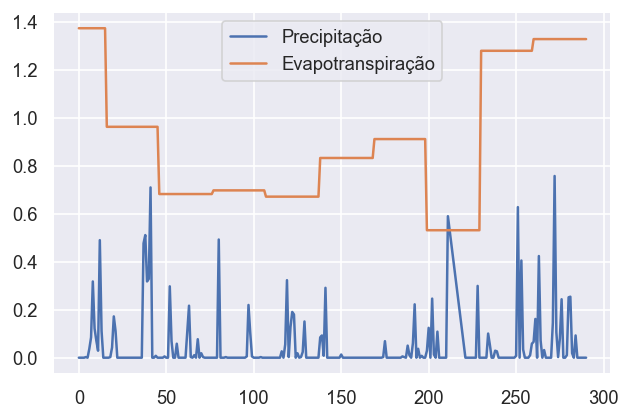

In [364]:
plt.figure(1, dpi=120)
plt.plot(tvals, chuva, label='Precipitação')
plt.plot(tvals, evap / 2, label='Evapotranspiração')
plt.legend()
plt.show()

# Sympy – Equações

In [365]:
from sympy import *

t, w, m, c_0 = symbols('t w m c_0')
c = symbols('c', cls=Function)

dcdt = Eq(c(t).diff(t), w - c(t) * m)
c_eq = dsolve(dcdt, c(t), ics={c(0): c_0})
c_eq = simplify(c_eq)

display(dcdt, c_eq)

Eq(Derivative(c(t), t), -m*c(t) + w)

Eq(c(t), (c_0*m + w*exp(m*t) - w)*exp(-m*t)/m)

# OD x DBO

## Solução analítica

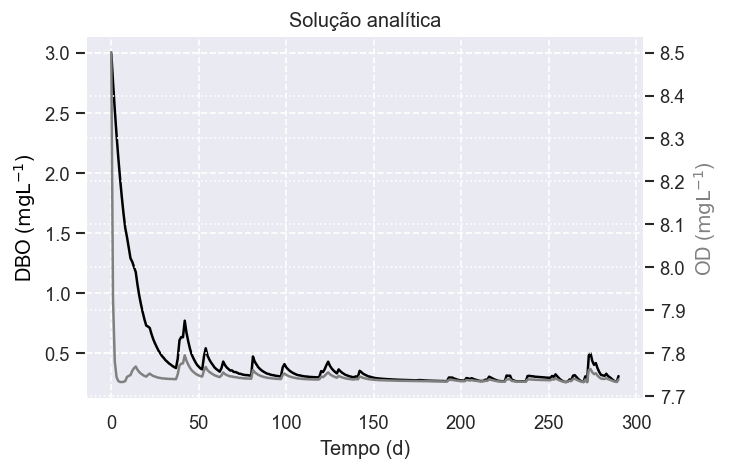

In [366]:
# Constantes
# Usadas no OD
F4_OD = dados_tributarios()['df_trib_F4']['Oxigênio dissolvido'][15]
TD4_OD = dados_tributarios()['df_trib_TD_4']['Oxigênio dissolvido'][15]
TE10_OD = dados_tributarios()['df_trib_TE_10']['Oxigênio dissolvido'][15]

k12 = np.mean([0.1, 0.5])
SOD = 4
rca = 10
roc = 2.6667
roa = 3.428571
roi = 1.142857
ron = roa + roi
ka = 1.38
kd = 0.01 # *
kg = 1
kra = 2
Os = 8.5
C_9 = 0.0128 # *
C_1 = 0.01 # *

# Geometria do reservatório
As = 242 * 1e6
V = 25.6 * 1e6
H = 5.6
t_vals = np.arange(0, 291, 1)

# Usadas na DBO
ma_5_teste = 9 * vazao_TD4_dias_interesse + 0.9 * vazao_TD4_dias_interesse + 0.1 * vazao_TE10_dias_interesse

fd5 = 0.5
vs3 = 1
kea = np.mean([0.01, 0.1])

# DBO
morte_fito_5_teste = roc * rca * kea * C_9

R_5_teste = morte_fito_5_teste

w_5_teste = ma_5_teste / V + R_5_teste # zerando as cargas afluentes
m_5_teste = (1 / V) * (kd * V + (vs3 * (1 - fd5) / H) * V)

c0_5_teste = 3

func_DBO = lambdify((c_0, t, m, w), c_eq.rhs, 'numpy')
DBO_vals = func_DBO(c0_5_teste, t_vals, m_5_teste, w_5_teste)

# OD
ma_6_teste = F4_OD * vazao_TD4_dias_interesse + TD4_OD * vazao_TD4_dias_interesse + TE10_OD * vazao_TE10_dias_interesse

reaeracao_6 = ka * Os
decomposicao_6 = kd * DBO_vals
nitrificacao_6 = ron * k12 * C_1
fotossintese_6 = roc * rca * kg * C_9
respiracao_fito_6 = roc * rca * kra * C_9
sedimento_6 = SOD / H

R_6_teste = reaeracao_6 - decomposicao_6 - nitrificacao_6 + fotossintese_6 - respiracao_fito_6 - sedimento_6

w_6_teste = ma_6_teste / V + R_6_teste
m_6_teste = (1 / V) * (ka * V)

c0_6_teste = 8.5

func_OD = lambdify((c_0, t, m, w), c_eq.rhs, 'numpy')
OD_vals = func_OD(c0_6_teste, t_vals, m_6_teste, w_6_teste)

sns.set_theme()

fig, ax1 = plt.subplots(1, dpi=120)

ax2 = ax1.twinx()
ax1.plot(t_vals, DBO_vals, 'black', label='DBO')
ax2.plot(t_vals, OD_vals, 'gray', label='OD')

ax1.set_xlabel('Tempo (d)')
ax1.set_ylabel('DBO ($\mathrm{mgL^{-1}}$)', color='black')
ax2.set_ylabel('OD ($\mathrm{mgL^{-1}}$)', color='gray')

plt.title('Solução analítica')

ax1.grid(linestyle='--')
ax2.grid(linestyle=':')

plt.show()

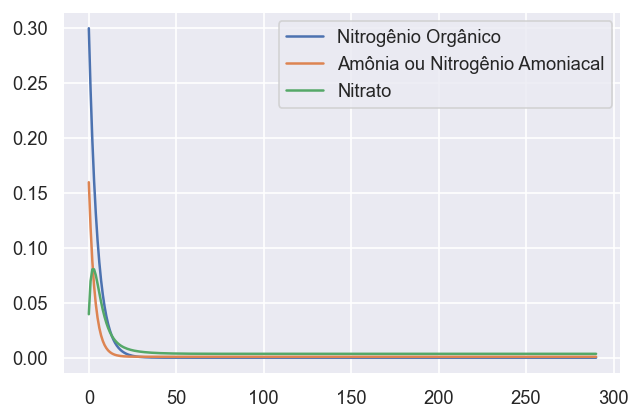

In [367]:
# Constantes: Nitrogênio Orgânico
k71  = 0.03
f7   = 0.01 # *
rna  = 0.01 # *
rna_min = np.mean([1.5, 4.0])
rna_max = np.mean([8.0, 15.0])
# rna = rna_min + (rna_max - rna_min) * ((C1 + C2) / (ksn + C1 + C2))
fon  = 0.5
kez  = np.mean([0.005, 0.02])
fon  = 0.5
C4   = 0.01
C7   = 0.01
C9   = 0.01

# Constantes: Amônia ou Nitrogênio Amoniacal
# C1 = 0.01
# C2 = 0.01
kam = 50
kuN = np.mean([0.0014, 0.2000])
fuN = 0.01 # *
# fuN = ((rna_max - rna) / (rna_max - rna_min)) * ((C1 + C2) / (kuN + C1 + C2))

# Constantes: Nitrato
k2d = 0.1

# Nitrogênio Orgânico
# amonificacao_7 = - k71 * C7
# sedimentacao_7 = - vs3 * (1 - f7) * C7 / H
# excre_fito_7 = rna * kra * fon * C9
# morte_fito_7 = rna * kea * fon * C9
excre_fito_7 = rna * kra * fon * C9
morte_fito_7 = rna * kea * fon * C9

# R7 = amonificacao_7 + sedimentacao_7 + excre_fito_7 + morte_fito_7

R7 = excre_fito_7 + morte_fito_7
# ma_7 = 0.01 * vazao_TD4_dias_interesse + 0.01 * vazao_TD4_dias_interesse + 0.01 * vazao_TE10_dias_interesse
ma_7 = 0
w_7 = ma_7 / V + R7
m_7 = (1 / V) * (k71 * V + (vs3 * (1 - f7) / H) * V)

c0_7 = 0.30

func_7 = lambdify((c_0, t, m, w), c_eq.rhs, 'numpy')
vals_7 = func_7(c0_7, t_vals, m_7, w_7)

# Amônia ou Nitrogênio Amoniacal
resp_fito_1 = rna * kra * (1 - fon) * C9
morte_fito_1 = rna * kea * (1 - fon) * C9
# cresc_fito_1 = - (C1 / (kam + C1)) * rna * fuN * kg * C9
# cresc_fito_1 = - C1 * rna * fuN * kg * C9 # Alteração de acordo com a professora
amonificacao_1 = k71 * C7
# amonificacao_1 = k71 * vals_7
# nitrificacao_1 = - k12 * C1

# R1 = resp_fito_1 + morte_fito_1 + cresc_fito_1 + amonificacao_1 + nitrificacao_1

R1 = resp_fito_1 + morte_fito_1 + amonificacao_1
# ma_1 = 0.005 * vazao_TD4_dias_interesse + 0.005 * vazao_TD4_dias_interesse + 0.005 * vazao_TE10_dias_interesse
ma_1 = 0
w_1 = ma_1 / V + R1
m_1 = (1 / V) * (rna * fuN * kg * C9 * V + k12 * V)

c0_1 = 0.16

func_1 = lambdify((c_0, t, m, w), c_eq.rhs, 'numpy')
vals_1 = func_1(c0_1, t_vals, m_1, w_1)

# Nitrato
# nitrificacao_2 = k12 * C1
nitrificacao_2 = k12 * vals_1
# desnitrificacao_2 = - k2d * C2
# cresc_fito_2 = - (1 - (C1 / (kam + C1))) * rna * fuN * kg * C9
cresc_fito_2 = - (1 - vals_1) * rna * fuN * kg * C9 # Alteração de acordo com a professora
# R2 = nitrificacao_2 + desnitrificacao_2 + cresc_fito_2

R2 = nitrificacao_2 + cresc_fito_2
# ma_2 = 0.007 * vazao_TD4_dias_interesse + 0.007 * vazao_TD4_dias_interesse + 0.007 * vazao_TE10_dias_interesse
ma_2 = 0
w_2 = ma_2 / V + R2
m_2 = (1 / V) * (k2d * V)

c0_2 = 0.04

func_2 = lambdify((c_0, t, m, w), c_eq.rhs, 'numpy')
vals_2 = func_2(c0_2, t_vals, m_2, w_2)

plt.figure(1, dpi=120)
plt.plot(t_vals, vals_7, label='Nitrogênio Orgânico')
plt.plot(t_vals, vals_1, label='Amônia ou Nitrogênio Amoniacal')
plt.plot(t_vals, vals_2, label='Nitrato')
plt.legend()
plt.show()

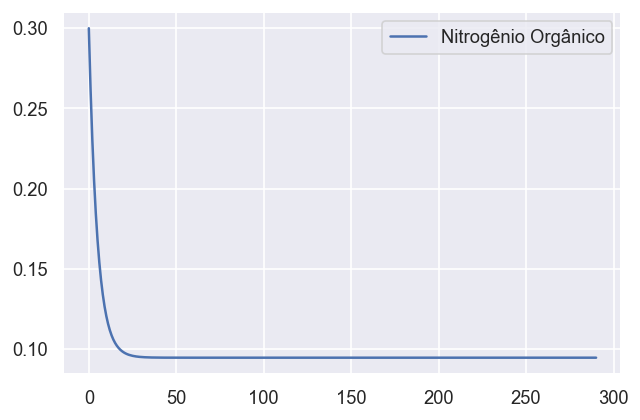

In [368]:
# Constantes: Nitrogênio Orgânico
k71  = 0.03
f7   = 0.01
rna  = 1.5
fon  = 0.05
kez = 0.02
fon  = 0.5
kea = 0.04

kam = 50
kuN = 0.0014
fuN = 0.01 # *
k2d = 0.01

C9 = 0.0128

excre_fito_7 = rna * kra * fon * C9
morte_fito_7 = rna * kea * fon * C9

R7 = excre_fito_7 + morte_fito_7
w_7 = R7
m_7 = (1 / V) * (k71 * V + (vs3 * (1 - f7) / H) * V)

c0_7 = 0.3

func_7 = lambdify((c_0, t, m, w), c_eq.rhs, 'numpy')
vals_7 = func_7(c0_7, t_vals, m_7, w_7)

plt.figure(1, dpi=120)
plt.plot(t_vals, vals_7, label='Nitrogênio Orgânico')
plt.legend()
plt.show()

## Solução numérica

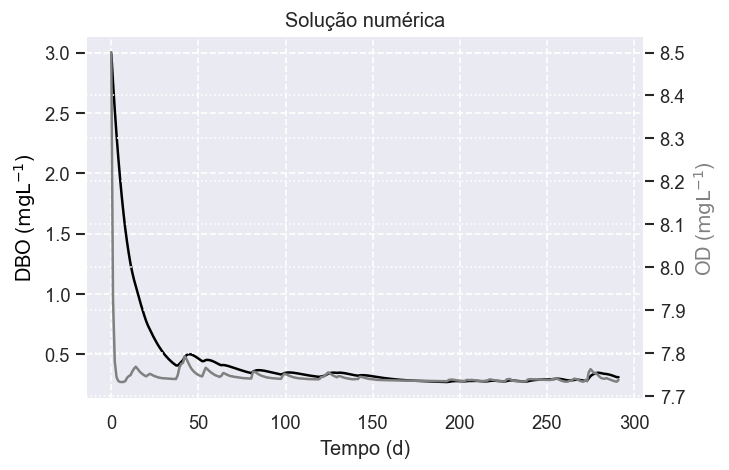

In [369]:
# O maior desafio agora: inserir infos de vazão, precipitação e evapotranspiração

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z, t, ma_5, ma_6):
    # DBO
    c_5 = z[0]
    # OD
    c_6 = z[1]

    # Constantes
    # Usadas no OD
    k12 = np.mean([0.1, 0.5])
    SOD = 4
    rca = 10
    roc = 2.6667
    roa = 3.428571
    roi = 1.142857
    ron = roa + roi
    ka = 1.38
    kd = 0.01 # *
    kg = 1
    kra = 2
    Os = 8.5
    C_9 = 0.0128 # *
    C_1 = 0.01 # *

    # Geometria do reservatório
    As = 242 * 1e6
    V = 25.6 * 1e6
    H = 5.6
    fd5 = 0.5
    vs3 = 1
    kea = np.mean([0.01, 0.1])

    # DBO
    morte_fito_5 = roc * rca * kea * C_9
    R_5 = morte_fito_5
    w_5 = ma_5 / V + R_5
    m_5 = (1 / V) * (kd * V + (vs3 * (1 - fd5) / H) * V)
    # OD
    reaeracao_6 = ka * Os
    decomposicao_6 = kd * c_5
    nitrificacao_6 = ron * k12 * C_1
    fotossintese_6 = roc * rca * kg * C_9
    respiracao_fito_6 = roc * rca * kra * C_9
    sedimento_6 = SOD / H
    R_6 = reaeracao_6 - decomposicao_6 - nitrificacao_6 + fotossintese_6 - respiracao_fito_6 - sedimento_6
    w_6 = ma_6 / V + R_6
    m_6 = (1 / V) * (ka * V)

    # DBO
    dc5dt = - m_5 * c_5 + w_5
    # OD
    dc6dt = - m_6 * c_6 + w_6

    return [dc5dt, dc6dt]

initial_condition = [3, 8.5]

n = 291

t = np.linspace(0, 291, n)

ma_5 = np.zeros(n)
ma_6 = np.zeros(n)

ma_5[:] = 9 * vazao_TD4_dias_interesse + 0.9 * vazao_TD4_dias_interesse + 0.1 * vazao_TE10_dias_interesse
# ma_6[:] = F4_OD[0] * vazao_TD4_dias_interesse + TD4_OD[0] * vazao_TD4_dias_interesse + TE10_OD[0] * vazao_TE10_dias_interesse
ma_6[:] = F4_OD * vazao_TD4_dias_interesse + TD4_OD * vazao_TD4_dias_interesse + TE10_OD * vazao_TE10_dias_interesse

c5 = np.empty_like(t)
c6 = np.empty_like(t)

c5[0] = initial_condition[0]
c6[0] = initial_condition[1]

for i in range(1, n):
    sol = odeint(model, initial_condition, t, args=(ma_5[i], ma_6[i]))
    c5[i] = sol[1][0]
    c6[i] = sol[1][1]
    initial_condition = sol[1]

sns.set_theme()

fig, ax1 = plt.subplots(1, dpi=120)

ax2 = ax1.twinx()
ax1.plot(t, c5, 'black', label='DBO')
ax2.plot(t, c6, 'gray', label='OD')

ax1.set_xlabel('Tempo (d)')
ax1.set_ylabel('DBO ($\mathrm{mgL^{-1}}$)', color='black')
ax2.set_ylabel('OD ($\mathrm{mgL^{-1}}$)', color='gray')

plt.title('Solução numérica')

ax1.grid(linestyle='--')
ax2.grid(linestyle=':')

plt.show()

## Solução analítica x Solução numérica – OD x DBO

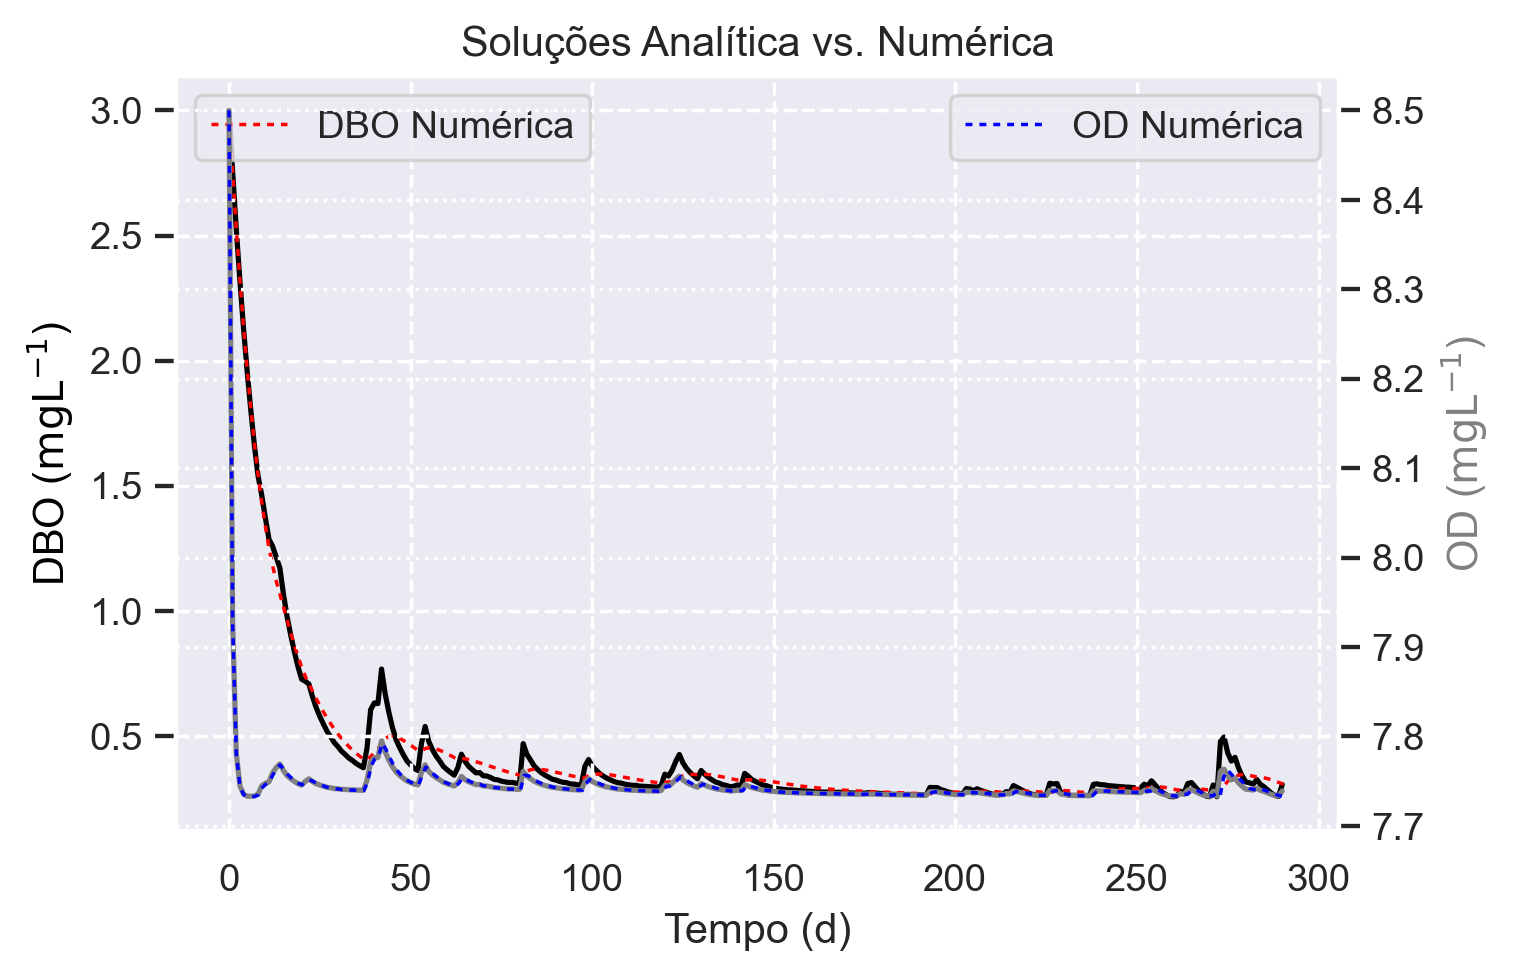

In [370]:
sns.set_theme()

fig, ax1 = plt.subplots(1, dpi=250)

# ax1: DBO
# ax2: OD

ax2 = ax1.twinx()
ax1.plot(t_vals, DBO_vals, color='black', zorder=0)
ax1.plot(t, c5, color='red', linestyle=(0, (2, 2)), linewidth=1, label='DBO Numérica', zorder=1)
ax2.plot(t_vals, OD_vals, color='gray', zorder=0)
ax2.plot(t, c6, color='blue', linestyle=(0, (2, 2)), linewidth=1, label='OD Numérica', zorder=1)

# Plotando dados discretos
# ax1.scatter([15 - 15, 43 - 15, 78 - 15, 114 - 15, 148 - 15, 169 - 15, 204 - 15, 329 - 15, 266 - 15, 296 - 15], dados_reservatorio_discretos()['OD (mg/L)'])

# ax1.scatter([15 - 15, 43 - 15, 78 - 15, 114 - 15, 148 - 15, 169 - 15, 204 - 15, 329 - 15, 266 - 15, 296 - 15], dados_reservatorio_discretos()['OD (mg/L)']) # Para DBO o que eu devo plotar?


ax1.set_xlabel('Tempo (d)')
ax1.set_ylabel('DBO ($\mathrm{mgL^{-1}}$)', color='black')
ax2.set_ylabel('OD ($\mathrm{mgL^{-1}}$)', color='gray')

plt.title('Soluções Analítica vs. Numérica')

ax1.legend(loc=2)
ax2.legend(loc=0)

ax1.grid(linestyle='--', zorder=10)
ax2.grid(linestyle=':', zorder=11)

# Nitrogênio Orgânico x Amônia ou Nitrogênio Amoniacal x Nitrato